# Découverte de Miniban Explorer

L'objectif de cette feuille de travail est d'apprendre les bases du contrôle de Miniban Explorer

In [1]:
import robot_header

## Initialisation du robot

Le code suivant initialise le robot. Cela consiste à se connecter aux différents composants du robot, et à vérifier s'ils fonctionnent. Exécute-le.  
(à noter que la cellule n'est pas modifiable)

In [2]:
import robot
bot = robot.Robot()

- connexion aux moteurs ... [ok]
- connexion à la caméra ... [ok]
- initialisation procédure de test globale
  - check moteurs:
    [avant gauche] 	temp: 44.0° 	volt: 10.40V  	[ok]
    [arrière gauche] 	temp: 45.0° 	volt: 10.10V  	[ok]
    [avant droit] 	temp: 43.0° 	volt: 10.10V  	[ok]
    [arrière droit] 	temp: 43.0° 	volt: 10.10V  	[ok]
  - check capteurs:
    [dist. avant] ... [ok]
    [dist. droite] ... [ok]
    [dist. gauche] ... [ok]
    [camera] ... [ok]
- procédure de test globale ... [ok]


*Attention, tu ne peux pas éxécuter plusieurs fois le code précédent. Si tu veux le ré-exécuter, il faut relancer le noyau. Pour ce faire, clique sur le menu "Noyau/Redémarrer", ensuite, il faut recommencer la feuille.*  
  

Examinons la sortie du code précédent. D'abord, on se connecte aux moteurs des roues et à la caméra. Ensuite s'exécute la procédure de test pour voir si tous les composants fonctionnent bien.
- les premiers tests concernent les moteurs des roues. On vérifie leur température. Un moteur qui chauffe, ça n'est jamais trop bon. Cette température ne doit pas excéder 55°. Ensuite, on vérifie leur alimentation en électricité, on appelle ça la tension électrique, elle est mesurée en Volt. Elle doit être un peu au dessus de 10V.
- après cela, on vérifie les capteurs. Et en premier les capteurs de distance, à l'avant, à droite et à gauche. Le test des capteurs est limité, on vérifie seulement que l'on a des valeurs.
- enfin, on vérifie que la caméra est bien connectée.

A tout moment, tu peux relancer la procédure de test avec la commande suivante que tu peux tester.

In [3]:
bot.check()

- initialisation procédure de test globale
  - check moteurs:
    [avant gauche] 	temp: 29.0° 	volt: 10.40V  	[ok]
    [arrière gauche] 	temp: 30.0° 	volt: 10.40V  	[ok]
    [avant droit] 	temp: 28.0° 	volt: 10.10V  	[ok]
    [arrière droit] 	temp: 28.0° 	volt: 10.10V  	[ok]
  - check capteurs:
    [dist. avant] ... [ok]
    [dist. droite] ... [ok]
    [dist. gauche] ... [ok]
    [camera] ... [ok]
- procédure de test globale ... [ok]


Tu peux aussi conduire certains tests de façon indépendante. Par exemple vérifier la température des moteurs:

In [4]:
bot.motor_temperature()

(29.0, 30.0, 28.0, 28.0)

ou encore leur tension d'alimentation:

In [5]:
bot.motor_voltage()

(10.4, 10.4, 10.100000000000001, 10.100000000000001)

## Capteurs de distance

In [6]:
bot.distance('avant')

40.691533948030184

In [112]:
bot.distance('gauche')

7.800000000000001

In [113]:
bot.distance('droite')

38.97342995169083

In [114]:
bot.distance()

{'avant': 15.138552130239004,
 'droite': 52.76766595289081,
 'gauche': 7.81532456861134}

In [180]:
N = 100
sum = 0.0
for i in range(N):
    sum += bot.distance('avant')
moyenne = sum / N
print ('moyenne de distance : %0.1fcm' % moyenne)

moyenne de distance : 27.8cm


## Déplacements

In [6]:
bot.avance(3.0,1)

In [22]:
d1 = bot.distance('avant')
bot.avance(5.0, 2)
d2 = bot.distance('avant')
print ("déplacement : %0.1fcm" % (d1-d2))

déplacement : 9.9cm


Avancer jusqu'à être à 10cm du mur

In [4]:
bot.stop()

In [20]:
import time
import chrono
chr = chrono.Chrono()
vitesse = 5.0
dists = []
temps = []
while True:
    bot.avance(vitesse)
    d = bot.distance('avant')
    dists.append(d)
    temps.append(chr.elapsed())
    if d < 5.0: break
    time.sleep(0.05)
bot.stop()

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

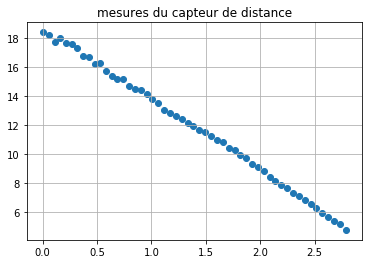

In [9]:
plt.grid()
plt.scatter(temps, dists)
plt.title('mesures du capteur de distance')
plt.show()

In [16]:
X = np.array(temps)
Y = np.array(dists)
a,b = np.polyfit(X,Y,1)
print ('On obtient comme approximation la droite y = %0.2f x + %0.2f' % (a,b))
print ('cela veut dire que le robot s\'est déplacé à %0.2f cm/s' % a)
print ('rapport (vitesse réelle) / (vitesse théorique) : %0.1f%%' % abs(100*a/vitesse))

On obtient comme approximation la droite y = -4.92 x + 18.69
cela veut dire que le robot s'est déplacé à -4.92 cm/s
rapport (vitesse réelle) / (vitesse théorique) : 98.3%


## Camera

- Enregistrement de l'image dans image.jpg


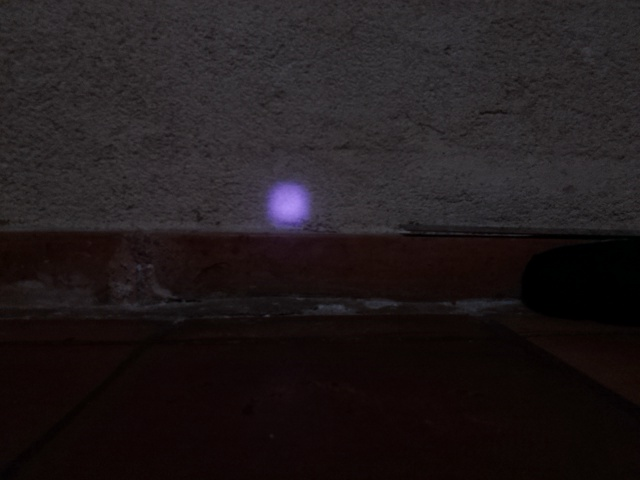

In [145]:
bot.photo()
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "image.jpg")